In [1]:
# Dataframes
import pandas as pd
from pandas import Series,DataFrame

import numpy as np

# Analysis/data viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

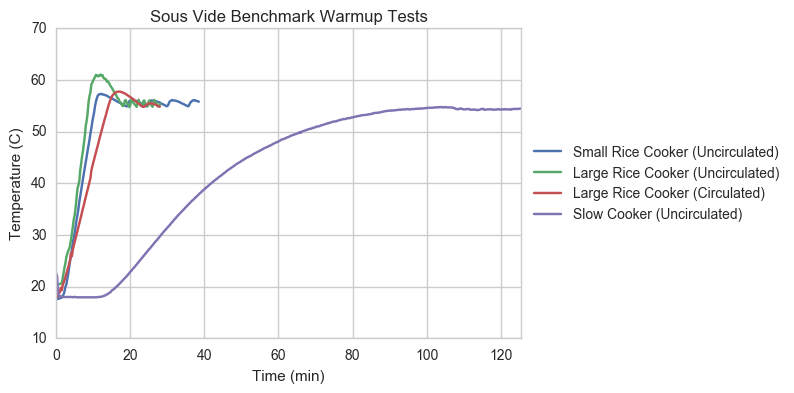

In [18]:
# Import the benchmark data
benchmark_df = pd.read_csv('Benchmarks//2017.01.07_55C Warmup Comparison_all.csv')
benchmark_df = benchmark_df.set_index(['Time'])

benchmark_df.drop('Large Rice Cooker (Uncirculated).1',axis=1,inplace=True)

# Plot the data
fig, ax = plt.subplots()

benchmark_df.plot(ax=ax)
ax.set_title('Sous Vide Benchmark Warmup Tests')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (min)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [3]:
import os

def findfiles(extension):
    fnames = []

    for item in os.listdir():
        if item.endswith(extension):
            fnames.append(item)
            
    return fnames

# Get names of all the data files
cook_logs = findfiles('.csv')

print(cook_logs)

['2017.01.03_Trout Fillet-48C.csv', '2017.01.04_Sirloin Steak-53C.csv', '2017.01.06_Chicken Thighs-70C.csv', '2017.01.07_Burger Patty-60C.csv']


Trout Fillet at 48C for 59 mins
   Mean:  48.35°C (+1.15, -0.73)
   Std:  ±0.34°C

Sirloin Steak at 53C for 84 mins
   Mean:  53.03°C (+1.78, -2.65)
   Std:  ±0.63°C

Chicken Thighs at 70C for 99 mins
   Mean:  70.03°C (+0.59, -1.53)
   Std:  ±0.30°C

Burger Patty at 60C for 31 mins
   Mean:  60.16°C (+0.72, -0.66)
   Std:  ±0.23°C

AVERAGE STANDARD DEV: ±0.38°C


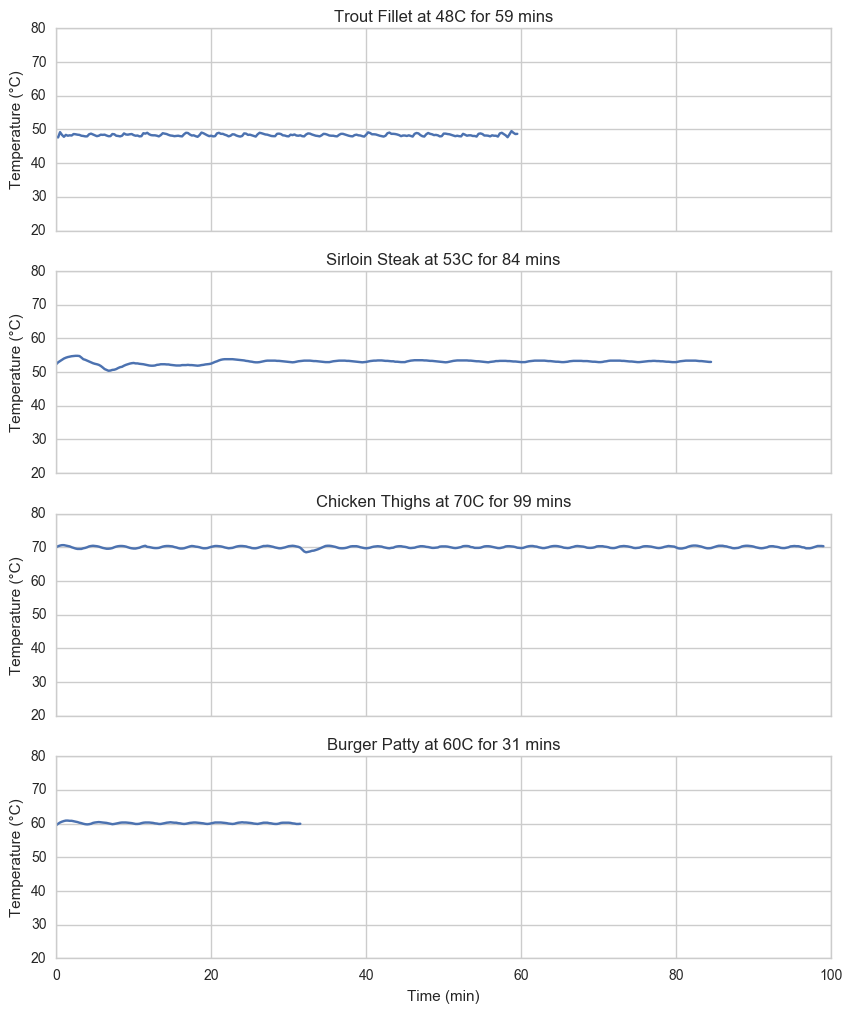

In [4]:
def getCooking(fname):
    sampling_freq = 15  # seconds
    step_size = sampling_freq / 60  # minutes
    
    df = pd.read_csv(fname)

    # Sort data by id b/c the order gets jumbled when exporting from Adafruit.io
    df = df.sort_values(by='id', ascending=True)

    # Construct time vector
    df['time'] = np.arange(0,len(df)*step_size,step_size)
    
    # Only keep the relevant data
    df = df[['time','value']]
    
    # Remove extension from filename
    fname = fname.rsplit(".", 1)[0]  
    
    # Extract what was cooked and temperature from the filename
    cook_object,temperature = fname.split('_')[1].split('-')
    title = '%s at %s for %d mins' % (cook_object, temperature, max(df['time']))
    
    return df, title

def plotCooking(df, title, axarr, i):
   
    axarr[i].plot(df['time'],df['value'])
    axarr[i].set_title(title)
    axarr[i].set_ylabel('Temperature (°C)')
    axarr[i].set_ylim([20,80])
#     axarr[i].set_xlim([0,140])
    
    if(i == len(axarr)-1):
        axarr[i].set_xlabel('Time (min)')
    
def analyzeCooks(cook_logs):
    n = len(cook_logs)
    
    means = np.zeros(n)
    mins  = np.zeros(n)
    maxs  = np.zeros(n)
    stds  = np.zeros(n)

    f, axarr = plt.subplots(n,1,figsize=(10,n*3),sharex=True,sharey=True)

    for i in range(0,len(cook_logs)):
        df,title = getCooking(cook_logs[i])

        plotCooking(df, title, axarr, i)

        means[i]  = df['value'].mean()
        mins [i] =  df['value'].min()
        maxs [i] =  df['value'].max()
        stds [i] =  df['value'].std()
        
        print(title)
        print('   Mean:  %.2f°C (+%.2f, -%.2f)' %(means[i], maxs[i]-means[i], means[i]-mins[i]))
        print('   Std:  ±%.2f°C' %stds[i])
        print()
        
    print('AVERAGE STANDARD DEV: ±%.2f°C' %stds.mean())
        
    # f.subplots_adjust(hspace=.6)

    #     all_df.append(df)
    #     all_title.append(title)
    
analyzeCooks(cook_logs)